In [2]:
print("Aum Namaha Shivaya")

Aum Namaha Shivaya


In [3]:
import pandas as pd
df_sales = pd.read_csv("bigmartsales-cleaned.csv")
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [5]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [6]:
df_sales.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


In [7]:
df_sales.isnull().values.any()

True

In [8]:
missing_values = df_sales.isnull().sum()
missing_values

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

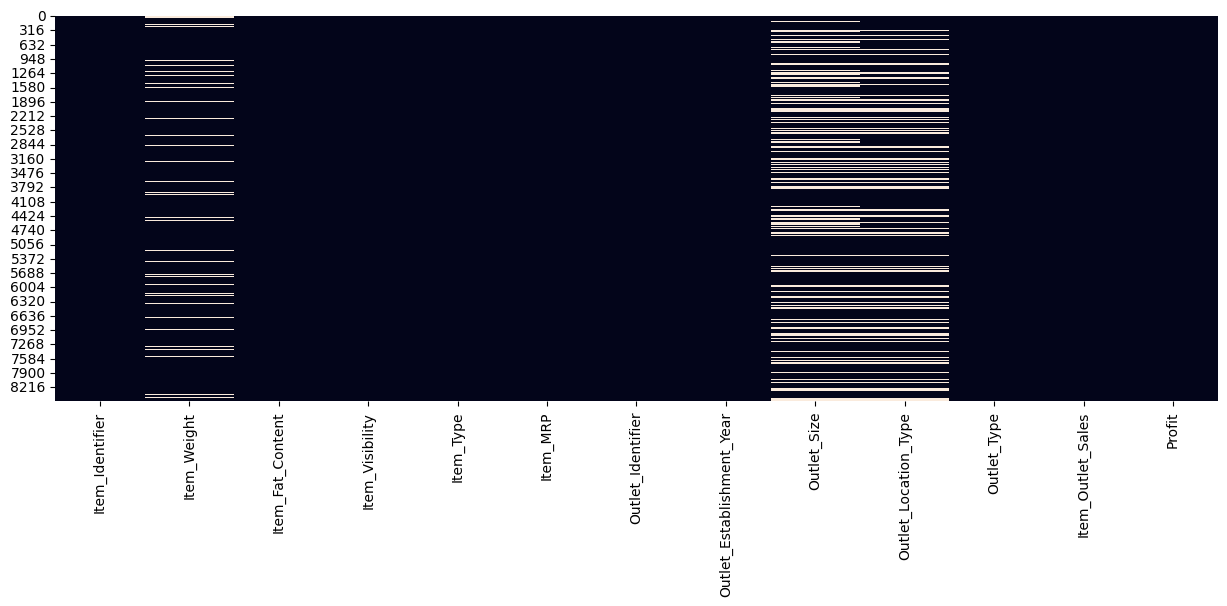

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,5]

sns.heatmap(df_sales.isnull(),cbar=False)

plt.show()

In [12]:
missing_values = df_sales.isnull().sum()

total = df_sales.isnull().sum().sort_values(ascending=False)

percent = ((df_sales.isnull().sum()/df_sales.shape[0])*100)

percent = percent.sort_values(ascending=False)

missing_data= pd.concat([total,percent],axis=1, keys=['Total','Percent'])

missing_data['Type'] = df_sales[missing_data.index].dtypes

missing_data

,Total,Percent,Type
Outlet_Size,2410,28.276428,object
Outlet_Location_Type,2050,24.052564,object
Item_Weight,749,8.787985,float64
Item_Identifier,0,0.000000,object
Item_Fat_Content,0,0.000000,object
Item_Visibility,0,0.000000,float64
Item_Type,0,0.000000,object
Item_MRP,0,0.000000,float64
Outlet_Identifier,0,0.000000,object
Outlet_Establishment_Year,0,0.000000,int64


In [13]:
df_sales_drop = df_sales.dropna()
df_sales_drop.shape

(5364, 13)